# EXAMINATION OF VEHICLE EMISSIONS (Data Modeling and Analysis)

This notebooK imports relavant data from the ev_and_ice_vehicle_datasets.ipynb to support data analysis

## LIBRARY IMPORTS

In [136]:
# Supports dataframes and data anlysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [137]:
# Supports machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.ensemble import RandomForestRegressor

In [138]:
# Note must install prophet using "pip install prophet" 
#From fbprophet import Prophet

In [139]:
# Supports Feature Engineering
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [140]:
# Supports model evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics  import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

In [141]:
# Included to ignore any warning dialoge generated
import warnings
warnings.filterwarnings('ignore')

## DATASETS IMPORTS
GENERAL VEHICLE DATAFRAMES
* **total_veh_sales_US** - total monthly US vehicle sales (thousand units) from 1978 through 2023
* **annual_veh_sales** - total annual US vehicle sales (thousand units) from 1978 through 2023
* **vehicle_emission_standards** - ice fuel efficency standards (mpg) from 1978 through 2031
* **emissions_by_class** - real-world ice fuel efficiency (mpg) and emissions (CO2 g/mi) for all light weight vehicles from 1975 to 2023
* **emissions_and_stds_by_class** - combines real-world emissions by class from 1975 to 2023 with emission standards by class from 2024 to 2031


ELECTRIC VEHICLE DATAFRAMES
* **BEV_PHEV_stock** - global stock (millons of units) of BEV and PHEVs by country from 2013 through 2023
* **global_EV_sales** - global sales (millons of units) of all EV sales by country from 2012 through Q1 2024
* **ev_outlook_US_hist** - historic EV/BEV/PHEV share (%) sales and stock (millions of units) from 2010 through 2023
* **ev_outlook_US_proj_STEPS** - historic and projected EV/BEV/PHEV share (%) sales and stock (millions of units) based on stated policies from 2010 through 2035
* **ev_outlook_US_proj_APS** - historic and projected EV/BEV/PHEV share (%) sales and stock (millions of units) based on announced pledges from 2020 through 2035
* **veh_lifecycle_GHG** - estimated lifecycle emissions (tons CO2e/vehicle) for a BEV and ICE vehicle


ELECTRICITY DATAFRAMES
* **net_generation** - net electricity generation (thousand MWh) for all sectors energy in US from 2010 to 2023
* **sector_elec_consumption** - electricity consumption for all energy sectors in US from 2010 to 2023\


US GHG DATAFRAMES
* **emissions_by_econ_sector** - ice fuel effciency standards from 1978 through 2031
* **avoided_emissions_2035_proj** - projected net avoided vehicle lifecycle emission (mmt CO2e) based on stated policies, announced pledges and net zero emission scenarios from 2023 to 2035
* **share_avoided_emissions_2035_proj** - projected share of net avoided vehicle lifecycle emission (%) by EV type based on stated policies, announced pledges and net zero emission scenarios from 2023 to 2035
* **lifecycle_GHG_2023_2035** - lifecycle emissions (t CO2e/vehicle) by powertrain\

In [142]:
# Supports accessing the variables and dataframes in this notebook from another notebook
import os
from datetime import datetime, timedelta

# Runs the code in ev_and_ice_vehicle_datasets.ipynb making its variables and dataframes available in this notebook
%run project_datasets.ipynb

'annual_veh_sales_SA (million units), 1976 to 2023'

,DATE,Total Vehicle Sales,Light Veh,Light Veh - Car,Light Veh - Truck,Heavy Veh,Light Veh Share - Car (%),Light Veh Share - Truck (%)
0,1976,159.479,155.593,119.932,35.661,3.886,0.770806,0.229194
1,1977,178.370,173.829,132.551,41.278,4.541,0.762537,0.237463
2,1978,184.958,179.674,133.967,45.707,5.284,0.745611,0.254389
3,1979,169.898,165.216,126.706,38.510,4.682,0.766911,0.233089
4,1980,137.563,134.309,107.782,26.527,3.254,0.802493,0.197507


'vehicle_emission_standards (mpg, 1978 to 2031)'

,Model Year,Passenger Cars,Light-Duty Trucks
0,1978,18.0,0.0
1,1979,19.0,0.0
2,1980,20.0,0.0
3,1981,22.0,0.0
4,1982,24.0,17.5


'emissions_and_stds_by_class (MPG, CO2 g/mi)'

'real-world emissions from 1975 to 2023 and future emissions standards from 2024 to 2031'

,Model Year,MPG (all),CO2 (g/mi) (all),MPG (car),CO2 (g/mi) (car),MPG (light truck),CO2 (g/mi) (light truck)
0,1975,13.06,680.60,12.68,706.54,11.42,779.08
1,1976,14.22,625.02,13.44,678.64,12.06,737.31
2,1977,15.07,590.00,14.45,623.76,13.05,681.63
3,1978,15.84,561.62,15.15,605.96,12.66,703.38
4,1979,15.91,559.69,16.25,552.04,11.94,750.80


'Avg passenger vehicle drive miles per year (avg_mi_per_yr): 13000'

'Avg passenger vehicle miles over useful life (life_mi): 208000'

'Avg passenger vehicle miles under warranty (mi_under_warranty): 100000'

'Avg passenger vehicle useful life (avg_veh_yrs): 16 years'

'BEV_PHEV_stock (millions of units), 2013 to 2023'

,Year,United States BEV,United States PHEV
0,2013,0.1,0.1
1,2014,0.1,0.2
2,2015,0.2,0.2
3,2016,0.3,0.3
4,2017,0.4,0.4


'ev_outlook_US_hist (millions of units, %), 2011 to 2035'

,region,category,parameter,mode,powertrain,year,unit,value
0,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200.00000
1,USA,Historical,EV stock,Cars,BEV,2010,Vehicles,3800.00000
2,USA,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.00016
3,USA,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",9.40000
4,USA,Historical,Electricity demand,Cars,EV,2010,GWh,96.00000
...,...,...,...,...,...,...,...,...
139,USA,Historical,EV sales,Cars,FCEV,2023,Vehicles,3000.00000
140,USA,Historical,EV stock,Cars,FCEV,2023,Vehicles,18000.00000
141,USA,Historical,EV sales,Cars,PHEV,2023,Vehicles,290000.00000
142,USA,Historical,"Oil displacement, million lge",Cars,EV,2023,"Oil displacement, million lge",9700.00000


'ev_outlook_US_proj_STEPS (millions of units, %), 2011 to 2035'

,region,category,parameter,mode,powertrain,year,unit,value
0,USA,Projection-STEPS,Oil displacement Mbd,Cars,EV,2020,Milion barrels per day,0.043
1,USA,Projection-STEPS,"Oil displacement, million lge",Cars,EV,2020,"Oil displacement, million lge",2500.000
2,USA,Projection-STEPS,Electricity demand,Cars,EV,2020,GWh,5400.000
3,USA,Projection-STEPS,EV sales,Cars,BEV,2020,Vehicles,230000.000
4,USA,Projection-STEPS,EV stock,Cars,BEV,2020,Vehicles,1100000.000
...,...,...,...,...,...,...,...,...
72,USA,Projection-STEPS,Oil displacement Mbd,Cars,EV,2035,Milion barrels per day,2.500
73,USA,Projection-STEPS,"Oil displacement, million lge",Cars,EV,2035,"Oil displacement, million lge",140000.000
74,USA,Projection-STEPS,Electricity demand,Cars,EV,2035,GWh,460000.000
75,USA,Projection-STEPS,EV stock share,Cars,EV,2035,percent,36.000


'LDV_elec_by_year (MWh), 2018 to Q1-2024'

,Year,PHEV,BEV,Total
0,2018,756806.0,824899.0,1581706
1,2019,884161.0,1175714.0,2059875
2,2020,1073251.0,1827049.0,2900300
3,2021,1242674.0,2276123.0,3518797
4,2022,2168276.0,4617155.0,6785431
5,2023,2792300.0,6980868.0,9773167
6,2024,900346.0,2348595.0,3248941


Average BEV kWh conumption per mile (kwh_per_mile): 0.303
Average BEV miles per full battery (mi_per_charge): 236
Average number of full charge cycles under BEV warrenty(war_chg_cyc): 424
Average number of full charge cycles over BEV lifetime(life_chg_cyc): 881


'net_generation (thousand MWh), 2010 to 2023'

,year,all fuels (utility-scale),coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,all utility-scale solar,geothermal,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other,all solar,small-scale solar photovoltaic,all utility-scale solar
1,2010,4125060,1847290,23337,13724,987697,11313,806968,260203,0,94652,1212,15219,56089,37172,18917,-5501,12855,--,--,1212
2,2011,4100141,1733430,16086,14096,1013689,11566,790204,319355,0,120177,1818,15316,56671,37449,19222,-6421,14154,--,--,1818
3,2012,4047765,1514043,13403,9787,1225894,11898,769331,276240,0,140822,4327,15562,57622,37799,19823,-4950,13787,--,--,4327
4,2013,4065964,1581115,13820,13344,1124836,12853,789016,268565,0,167840,9036,15775,60858,40028,20830,-4681,13588,--,--,9036
5,2014,4093564.0,1581710.0,18276.0,11955.0,1126635.0,12022.0,797166.0,259367.0,0.0,181655.0,17691.0,15877.0,63989.0,42340.0,21650.0,-6174.0,13393.0,28924.0,11233.0,17691.0


'sector_elec_consumption (thousand tons coal, thousand barrels liquid, thousand tons coke, thousand Mcf NG), 2010 to 2023'

,year,coal,petroleum liquids,petroleum coke,natural gas
1,2010,979684.0,40103.0,4994.0,7680185.0
2,2011,934938.0,27326.0,5012.0,7883865.0
3,2012,825734.0,22604.0,3675.0,9484710.0
4,2013,860729.0,23231.0,4852.0,8596299.0
5,2014,853634.0,31531.0,4412.0,8544387.0


'veh_lifecycle_GHG (tCO2e per vehicle), 2020 estimate'

,Vehicle Type,Vehicle manufacturing,Batteries-assembly and other,Batteries-minerals,Electricity,Fuel cycle (well-to-wheel),Embodied CO2e,Operations CO2e,Lifecycle CO2e
0,Battery electric vehicle - Base case,5.4,1.20,1.40,11.7,0.0,8.00,23.4,31.40
1,Battery electric vehicle - High-GHG minerals ...,5.4,1.20,2.80,11.7,0.0,9.40,23.4,32.80
2,Internal combustion engine vehicle,6.0,0.01,0.03,0.0,35.9,6.04,35.9,41.94


'veh_lifecycle_GHG_2035 (tCO2e per vehicle), 2035 projection'

,Year,Powertrain Type,Car production,Battery production,Well-to-tank,Tank-to-wheel,Embodied CO2e,Tailpipe CO2e,Grid decarbonisation impact,Lifecycle CO2e
0,2023,ICEV,3.7,0.0,11.5,30.9,15.2,30.9,0.0,46.1
1,2023,HEV,3.7,0.1,9.8,26.3,13.6,26.3,0.0,39.9
2,2023,PHEV,4.4,1.3,11.7,15.8,17.4,15.8,1.9,33.2
3,2023,BEV,3.3,5.3,14.5,0.0,23.1,0.0,4.8,23.1


,Year,Powertrain Type,Car production,Battery production,Well-to-tank,Tank-to-wheel,Embodied CO2e,Tailpipe CO2e,Grid decarbonisation impact,Lifecycle CO2e
0,2035,ICEV,3.7,0.0,8.1,26.4,11.8,26.4,0.0,38.2
1,2035,HEV,3.7,0.1,6.9,22.4,10.7,22.4,0.0,33.1
2,2035,PHEV,4.4,0.8,7.7,13.4,12.9,13.4,4.2,26.3
3,2035,BEV,2.9,3.2,8.8,0.0,14.9,0.0,10.6,14.9


'emissions_by_econ_sector (MMT CO2e), 1990 to 2022'

,Year,Transportation,Electricity Generation,Industry,Agriculture,Commercial,Residential,Total
0,1990,1521.4,1880.2,1723.3,595.9,447.0,345.6,6513.5
1,1991,1474.8,1874.4,1702.9,587.4,454.5,355.3,6449.2
2,1992,1533.8,1889.6,1729.3,587.5,450.0,361.8,6552.0
3,1993,1570.2,1965.0,1701.0,608.7,443.1,373.1,6661.2
4,1994,1624.5,1989.6,1719.7,612.2,446.1,363.8,6755.8


'avoided_emissions_2035_proj (MMT CO2e), 2023 to 2035'

,Year,STEPS,APS,NZE
0,2023,-130,-130,-120
1,2024,-180,-180,-200
2,2025,-240,-250,-310
3,2026,-320,-330,-440
4,2027,-420,-430,-600
5,2028,-540,-550,-790
6,2029,-680,-700,-1000
7,2030,-840,-880,-1230
8,2031,-1010,-1070,-1470
9,2032,-1190,-1270,-1720


In [143]:
# Added to show all columns in df display
pd.options.display.max_columns = 25 

## VEHICLE SALES AND STOCK PREDICTIONS

### Predicting Light Weight Vehicle Sales From Historic Sales Data
_Uses **Linear Regression Model** to predict car and light truck sales using 1975 to 2022 sales.\
We use 2023 data as a test and predict sales values by class (car, light truck) in 2030, 2035, 2040, 2045 and 2050_

Mean squared error: 556.3055577309258
R-squared score: -0.18961430534076817


'\nPredicted Total Vehicle, Light Car and Light Truck Salesin the US:'

,Year,Predicted Total Vehicle Sales,Predicted Car Sales,Predicted Light Truck Sales
0,2035,193.603238,38.144415,164.222438
1,2040,196.337385,30.177499,175.696866
2,2045,199.071532,22.210583,187.171294
3,2050,201.805679,14.243667,198.645722


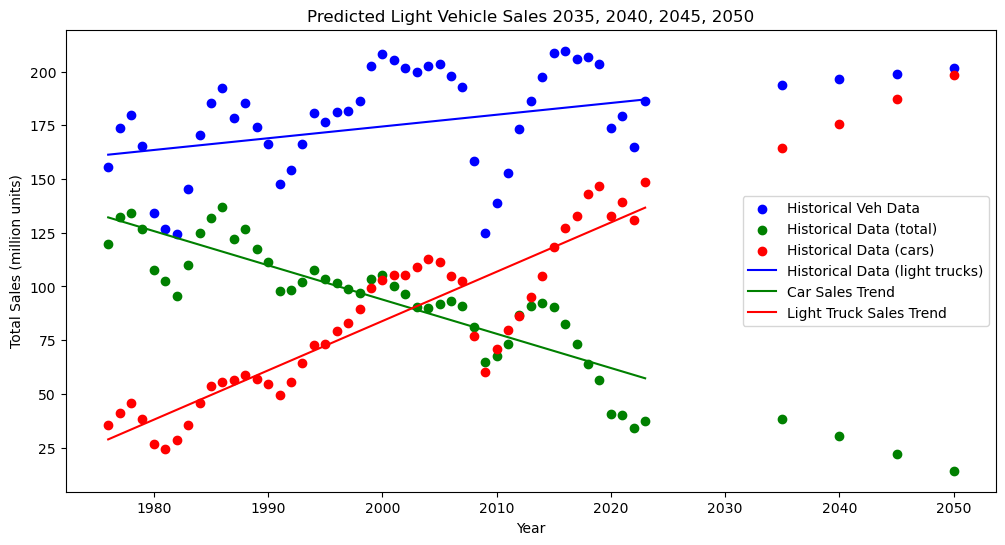

In [144]:
# Prepare the data (Annual vehicle sales)
X = annual_veh_sales_SA[['DATE']]
y = annual_veh_sales_SA['Light Veh'].values
y_lt_car = annual_veh_sales_SA['Light Veh - Car'].values
y_lt_truck = annual_veh_sales_SA['Light Veh - Truck'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model/Fit
model = LinearRegression()
model.fit(X_train, y_train)

model_lt_car = LinearRegression()
model_lt_truck = LinearRegression()

model_lt_car.fit(X, y_lt_car)
model_lt_truck.fit(X, y_lt_truck)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")

# Predict (Annual vehicle sales in 2035, 2040, 2045, 2050)
future_years = np.array([2035, 2040, 2045, 2050]).reshape(-1, 1)
future_predictions = model.predict(future_years)
predicted_lt_car = model_lt_car.predict(future_years)
predicted_lt_truck = model_lt_truck.predict(future_years)

veh_sales_prediction = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Total Vehicle Sales': future_predictions,
    'Predicted Car Sales': predicted_lt_car,
    'Predicted Light Truck Sales': predicted_lt_truck
})


    
display("\nPredicted Total Vehicle, Light Car and Light Truck Salesin the US:")
display(veh_sales_prediction)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Historical Veh Data')
plt.scatter(X, y_lt_car, color='green', label='Historical Data (total)')
plt.scatter(X, y_lt_truck, color='red', label='Historical Data (cars)')
plt.plot(X, model.predict(X), color='blue', label='Historical Data (light trucks)')
plt.plot(X, model_lt_car.predict(X), color='green', label='Car Sales Trend')
plt.plot(X, model_lt_truck.predict(X), color='red', label='Light Truck Sales Trend')
plt.scatter(future_years, future_predictions, color='blue')
plt.scatter(future_years, predicted_lt_car, color='green')
plt.scatter(future_years, predicted_lt_truck, color='red')
plt.xlabel('Year')
plt.ylabel('Total Sales (million units)')
plt.title('Predicted Light Vehicle Sales 2035, 2040, 2045, 2050')
plt.legend()
plt.show()

**OBSERVATION** \
Prediction shows that an increasing share of light vehicle sales will be light trucks indicating that the Truck Class will be the predominate future emissions standard for light duty vehicles

### Consolidating Clean EV Sales and Stock Datasets
_Combines historic and predicted total sales, BEV and PHEV vehicle sales data with historic and forecasted EV sales and stock data_

In [145]:
# VEHICLE DATASETS TO BE JOINED

# Creates Light Duty Vehicle historical sales and share of sales
hist_sales = annual_veh_sales_SA.copy()

hist_sales.rename(columns={
    'DATE': 'Year', 
    'Light Veh': 'Total Light Veh Sales',
    'Light Veh - Car': 'Car Sales',
    'Light Veh - Truck': 'Truck Sales',
    'Light Veh Share - Car (%)': 'Car Sales Share (%)',
    'Light Veh Share - Truck (%)': 'Truck Sales Share (%)'
}, inplace=True)

hist_sales.drop(columns=['Total Vehicle Sales', 'Heavy Veh'], axis=1, inplace=True)


# Creates Light Duty Vehicle predicted sales and share of sales
veh_sales_prediction['Car Sales Share (%)'] = veh_sales_prediction['Predicted Car Sales']/veh_sales_prediction['Predicted Total Vehicle Sales'] 
veh_sales_prediction['Truck Sales Share (%)'] = veh_sales_prediction['Predicted Light Truck Sales']/veh_sales_prediction['Predicted Total Vehicle Sales']

pred_sales = veh_sales_prediction.copy()

pred_sales.rename(columns={'Predicted Total Vehicle Sales':'Total Light Veh Sales',
                                                 'Predicted Car Sales':'Car Sales',
                                                 'Predicted Light Truck Sales':'Truck Sales',
                                                 'Light Veh Share - Car (%)':'Car Sales Share (%)',
                                                 'Light Veh Share - Truck (%)':'Truck Sales Share (%)'
                                                  }, inplace=True)


# Creates BEV historical stock 
veh_stock_bev = ev_outlook_US_hist[
    (ev_outlook_US_hist['parameter'] == 'EV stock') &
    (ev_outlook_US_hist['powertrain'] != 'FCEV') &
    (ev_outlook_US_hist['powertrain'] != 'PHEV')
][['year', 'powertrain', 'value']]


veh_stock_bev.drop(columns='powertrain', axis=1, inplace = True)
veh_stock_bev = veh_stock_bev.rename(columns={'year': 'Year', 'value': 'BEV Stock'})
veh_stock_bev = veh_stock_bev.reset_index(drop=True)



# Creates PHEV historical stock 
veh_stock_phev = ev_outlook_US_hist[
    (ev_outlook_US_hist['parameter'] == 'EV stock') &
    (ev_outlook_US_hist['powertrain'] != 'FCEV') &
    (ev_outlook_US_hist['powertrain'] != 'BEV')
][['year', 'powertrain', 'value']]

veh_stock_phev.drop(columns='powertrain', axis=1, inplace = True)
veh_stock_phev  = veh_stock_phev.rename(columns={'year': 'Year', 'value': 'PHEV Stock'})
veh_stock_phev  = veh_stock_phev.reset_index(drop=True)



# Creates BEV historical sales 
hist_bev_sales = ev_outlook_US_hist[
    (ev_outlook_US_hist['parameter'] == 'EV sales') &
    (ev_outlook_US_hist['powertrain'] != 'FCEV') &
    (ev_outlook_US_hist['powertrain'] != 'PHEV')
][['year', 'powertrain', 'value']]

hist_bev_sales.drop(columns='powertrain', axis=1, inplace = True)
hist_bev_sales = hist_bev_sales.rename(columns={'year': 'Year', 'value': 'BEV Sales'})
hist_bev_sales = hist_bev_sales.reset_index(drop=True)


# Creates PHEV historical sales 
hist_phev_sales = ev_outlook_US_hist[
    (ev_outlook_US_hist['parameter'] == 'EV sales') &
    (ev_outlook_US_hist['powertrain'] != 'FCEV') &
    (ev_outlook_US_hist['powertrain'] != 'BEV')
][['year', 'powertrain', 'value']]

hist_phev_sales.drop(columns='powertrain', axis=1, inplace = True)
hist_phev_sales = hist_phev_sales.rename(columns={'year': 'Year', 'value': 'PHEV Sales'})
hist_phev_sales = hist_phev_sales.reset_index(drop=True)


# Creates BEV forecasted sales (STEP)
proj_bev_sales = ev_outlook_US_proj_STEPS[
    (ev_outlook_US_proj_STEPS['parameter'] == 'EV sales') &
    (ev_outlook_US_proj_STEPS['powertrain'] != 'FCEV') &
    (ev_outlook_US_proj_STEPS['powertrain'] != 'PHEV')
][['year', 'powertrain', 'value']]

proj_bev_sales.drop(columns='powertrain', axis=1, inplace = True)
proj_bev_sales = proj_bev_sales.rename(columns={'year': 'Year', 'value': 'BEV Sales'})
proj_bev_sales = proj_bev_sales.reset_index(drop=True)


# Creates PHEV forecasted sales (STEP)
proj_phev_sales = ev_outlook_US_proj_STEPS[
    (ev_outlook_US_proj_STEPS['parameter'] == 'EV sales') &
    (ev_outlook_US_proj_STEPS['powertrain'] != 'FCEV') &
    (ev_outlook_US_proj_STEPS['powertrain'] != 'BEV')
][['year', 'powertrain', 'value']]

proj_phev_sales.drop(columns='powertrain', axis=1, inplace = True)
proj_phev_sales = proj_phev_sales.rename(columns={'year': 'Year', 'value': 'PHEV Sales'})
proj_phev_sales = proj_phev_sales.reset_index(drop=True)



### Building Initial EV Vehicle Sales and Stock Model
_Combines Total Sales and consolidated EV data to calculate ICE sales and vehicle stocks over time. \
Historic ICE stock in 1975 was approximately 107 million units.\
Documentation available at: https://www.fhwa.dot.gov/ohim/summary95/mv200.pdf_

In [146]:
# JOINING TOTAL AND EV DATA TO CALCULATE ICE SALES AND STOCK DATA

# ICE stock in 1975 was approximately 107 million accournding to the US Federal Highway Adminstration.
initial_ICE_stock = 107

# Combines historic and projected sales data into single set of dataframes
veh_sales = pd.concat([hist_sales, pred_sales], axis=0, ignore_index=True)
veh_sales_bev= pd.concat([hist_bev_sales, proj_bev_sales], axis=0, ignore_index=True)
veh_sales_phev = pd.concat([hist_phev_sales, proj_phev_sales], axis=0, ignore_index=True)

vehicle_data = (veh_sales
                .merge(veh_stock_bev, on='Year', how='left')
                .merge(veh_sales_bev, on='Year', how='left')
                .merge(veh_stock_phev, on='Year', how='left')
                .merge(veh_sales_phev, on='Year', how='left')
                     )

vehicle_data.fillna(0, inplace = True)

# Sets sales and stock to million units to align with 'Total Vehicle Sales' data
adjusted_col = ['BEV Stock','BEV Sales', 'PHEV Stock', 'PHEV Sales']
vehicle_data[adjusted_col] = vehicle_data[adjusted_col]/1000000

#Assumes Announced Pledges Scenario
vehicle_data['Total EV Sales'] = vehicle_data['BEV Sales'] + vehicle_data['PHEV Sales']
vehicle_data['ICE Sales'] = vehicle_data['Total Light Veh Sales'] - vehicle_data['Total EV Sales']

# Assumes vehicles are retired after 16 years
vehicle_data['BEV Retirements'] = vehicle_data['BEV Sales'].shift(16).fillna(0)
vehicle_data['PHEV Retirements'] = vehicle_data['PHEV Sales'].shift(16).fillna(0)
vehicle_data['ICE Retirements'] = vehicle_data['ICE Sales'].shift(16).fillna(0)


vehicle_data['BEV Stock'] = vehicle_data['BEV Sales'] + vehicle_data['BEV Stock'] - vehicle_data['BEV Retirements']
vehicle_data['PHEV Stock'] = vehicle_data['PHEV Sales'] + vehicle_data['PHEV Stock']- vehicle_data['PHEV Retirements']
vehicle_data['Total EV Stock'] = vehicle_data['BEV Stock'] + vehicle_data['PHEV Stock']
vehicle_data['ICE Stock'] = initial_ICE_stock + vehicle_data['ICE Sales'] - vehicle_data['ICE Retirements'] 
vehicle_data['Total Light Veh Stock'] = vehicle_data['Total EV Stock'] + vehicle_data['ICE Stock']


display ('ALL Projections')
display (vehicle_data.tail(10))

'ALL Projections'

,Year,Total Light Veh Sales,Car Sales,Truck Sales,Car Sales Share (%),Truck Sales Share (%),BEV Stock,BEV Sales,PHEV Stock,PHEV Sales,Total EV Sales,ICE Sales,BEV Retirements,PHEV Retirements,ICE Retirements,Total EV Stock,ICE Stock,Total Light Veh Stock
54,2022,165.053000,34.305000,130.748000,0.207842,0.792158,2.837,0.8,1.045,0.19,0.99,164.063000,0.063,0.055,197.309,3.882,73.754000,77.636000
55,2022,165.053000,34.305000,130.748000,0.207842,0.792158,2.829,0.8,1.057,0.19,0.99,164.063000,0.071,0.043,208.780,3.886,62.283000,66.169000
56,2023,186.288000,37.446000,148.842000,0.201011,0.798989,4.513,1.1,1.517,0.29,1.39,184.898000,0.087,0.073,209.567,6.030,82.331000,88.361000
57,2023,186.288000,37.446000,148.842000,0.201011,0.798989,4.500,1.1,1.496,0.29,1.39,184.898000,0.100,0.094,205.607,5.996,86.291000,92.287000
58,2023,186.288000,37.446000,148.842000,0.201011,0.798989,4.360,1.1,1.470,0.29,1.39,184.898000,0.240,0.120,206.339,5.830,85.559000,91.389000
59,2023,186.288000,37.446000,148.842000,0.201011,0.798989,4.360,1.1,1.505,0.29,1.39,184.898000,0.240,0.085,203.207,5.865,88.691000,94.556000
60,2035,193.603238,38.144415,164.222438,0.197024,0.848242,9.070,9.3,1.836,1.90,11.20,182.403238,0.230,0.064,173.368,10.906,116.035238,126.941238
61,2040,196.337385,30.177499,175.696866,0.153702,0.894872,-0.230,0.0,-0.064,0.00,0.00,196.337385,0.230,0.064,173.368,-0.294,129.969385,129.675385
62,2045,199.071532,22.210583,187.171294,0.111571,0.940221,-0.230,0.0,-0.064,0.00,0.00,199.071532,0.230,0.064,173.368,-0.294,132.703532,132.409532
63,2050,201.805679,14.243667,198.645722,0.070581,0.984342,-0.230,0.0,-0.064,0.00,0.00,201.805679,0.230,0.064,173.368,-0.294,135.437679,135.143679


### Predicting EV Sales and Stock Data
_Uses **Linear Regression Model** to predict BEV and PHEV sales using 2011 sales.\
We use 2023 data as a test and predict BEV and PHEV sales in 2030, 2035, 2040, 2045 and 2050_

In [147]:
# PREPARES EV SALES DATA FOR MODELING

# Define relevant EV data from initial vehicle data df
initial_ev_data = vehicle_data.drop(range(60,64))
initial_ev_data = vehicle_data.drop(range(0,34))

#Applies EPA ambition of 56% sales are BEV and 13% PHEV
total_light_veh_sales_2023 = initial_ev_data.loc[initial_ev_data['Year'] == 2023, 'Total Light Veh Sales'].values[0]

bev_sales_2035 = 0.56 * total_light_veh_sales_2023
phev_sales_2035 = 0.13 * total_light_veh_sales_2023
total_ev_sales_2035 = bev_sales_2035 + phev_sales_2035

# Creates a new row for 2035 EV sales
new_row = pd.DataFrame({
    'Year': [2035],
    'Total Light Veh Sales': [total_light_veh_sales_2023],  
    'Car Sales': [None],  # Not adding, entry already exists
    'Truck Sales': [None],  # Not adding, entry already exists
    'Car Sales Share (%)': [None],  # Not adding, entry already exists
    'Truck Sales Share (%)': [None],  # Not adding, entry already exists
    'BEV Stock': [None],  # Not adding, entry already exists
    'BEV Sales': [bev_sales_2035],
    'PHEV Stock': [None],  # Not adding, entry already exists
    'PHEV Sales': [phev_sales_2035],
    'Total EV Sales': [total_ev_sales_2035],
    'ICE Sales': [total_light_veh_sales_2023 - total_ev_sales_2035],  
    'BEV Retirements': [None],  # Not adding, entry already exists
    'PHEV Retirements': [None],  # Not adding, entry already exists
    'ICE Retirements': [None],  # Not adding, entry already exists
    'Total EV Stock': [None],  # Not adding, entry already exists
    'ICE Stock': [None],  # Not adding, entry already exists
    'Total Light Veh Stock': [None] # Not adding, entry already exists
})

# Adds EPA 2035 ambition data to initial ev sales dataset
initial_ev_data = pd.concat([initial_ev_data, new_row], ignore_index=True)

# Sort to place 2035 data at end
initial_ev_data = initial_ev_data.sort_values('Year').reset_index(drop=True)

# Removes rows with no data and earliest EV sales data
initial_ev_data = initial_ev_data .drop(range(27,31))
initial_ev_data = initial_ev_data .drop(range(0,9))
display(initial_ev_data.tail(10))

,Year,Total Light Veh Sales,Car Sales,Truck Sales,Car Sales Share (%),Truck Sales Share (%),BEV Stock,BEV Sales,PHEV Stock,PHEV Sales,Total EV Sales,ICE Sales,BEV Retirements,PHEV Retirements,ICE Retirements,Total EV Stock,ICE Stock,Total Light Veh Stock
17,2021,179.363000,40.200000,139.163000,0.224126,0.775874,1.970,0.47,0.880,0.16,0.63,178.733000,0.000,0.000,158.340,2.850,127.393000,130.243000
18,2022,165.053000,34.305000,130.748000,0.207842,0.792158,2.885,0.80,1.061,0.19,0.99,164.063000,0.015,0.039,173.162,3.946,97.901000,101.847000
19,2022,165.053000,34.305000,130.748000,0.207842,0.792158,2.852,0.80,1.051,0.19,0.99,164.063000,0.048,0.049,186.264,3.903,84.799000,88.702000
20,2022,165.053000,34.305000,130.748000,0.207842,0.792158,2.837,0.80,1.045,0.19,0.99,164.063000,0.063,0.055,197.309,3.882,73.754000,77.636000
21,2022,165.053000,34.305000,130.748000,0.207842,0.792158,2.829,0.80,1.057,0.19,0.99,164.063000,0.071,0.043,208.780,3.886,62.283000,66.169000
22,2023,186.288000,37.446000,148.842000,0.201011,0.798989,4.513,1.10,1.517,0.29,1.39,184.898000,0.087,0.073,209.567,6.030,82.331000,88.361000
23,2023,186.288000,37.446000,148.842000,0.201011,0.798989,4.500,1.10,1.496,0.29,1.39,184.898000,0.100,0.094,205.607,5.996,86.291000,92.287000
24,2023,186.288000,37.446000,148.842000,0.201011,0.798989,4.360,1.10,1.470,0.29,1.39,184.898000,0.240,0.120,206.339,5.830,85.559000,91.389000
25,2023,186.288000,37.446000,148.842000,0.201011,0.798989,4.360,1.10,1.505,0.29,1.39,184.898000,0.240,0.085,203.207,5.865,88.691000,94.556000
26,2035,193.603238,38.144415,164.222438,0.197024,0.848242,9.070,9.30,1.836,1.90,11.20,182.403238,0.230,0.064,173.368,10.906,116.035238,126.941238


Mean squared error: 0.585792523332654
R-squared score: -21.704971556220436


'\nPredicted EV Sales in the US (based on EPA 56% BEV and 13% PHEV goal)'

,Year,Predicted Total EV Sales,Predicted BEV Sales,Predicted PHEV Sales
0,2035,10.732309,8.686388,1.794623
1,2040,14.414110,11.626366,2.387344
2,2045,18.095912,14.566344,2.980064
3,2050,21.777713,17.506322,3.572784


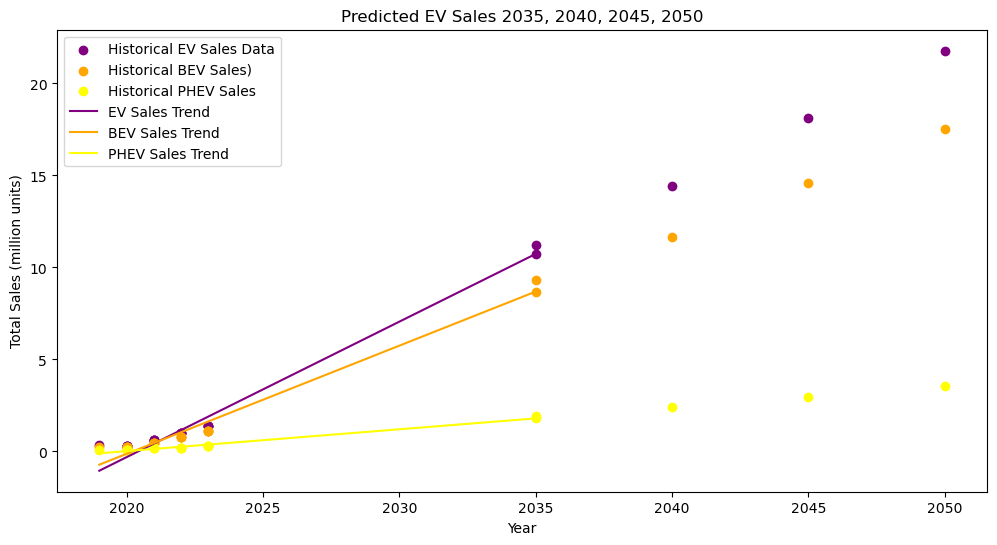

In [148]:
# PREDICTS FUTURE EV SALES
X = initial_ev_data[['Year']]
y = initial_ev_data['Total EV Sales'].values
y_BEV_sales = initial_ev_data['BEV Sales'].values
y_PHEV_sales = initial_ev_data['PHEV Sales'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model/Fit
model = LinearRegression()
model.fit(X_train, y_train)

model_BEV_sales = LinearRegression()
model_PHEV_sales = LinearRegression()

model_BEV_sales.fit(X, y_BEV_sales)
model_PHEV_sales.fit(X, y_PHEV_sales)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")

# Predict (Annual vehicle sales in 2035, 2040, 2045, 2050)
future_years = np.array([2035, 2040, 2045, 2050]).reshape(-1, 1)
predicted_EV_sales = model.predict(future_years)
predicted_BEV_sales = model_BEV_sales.predict(future_years)
predicted_PHEV_sales = model_PHEV_sales.predict(future_years)

ev_sales_prediction = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Total EV Sales': predicted_EV_sales,
    'Predicted BEV Sales': predicted_BEV_sales,
    'Predicted PHEV Sales': predicted_PHEV_sales
})


    
display("\nPredicted EV Sales in the US (based on EPA 56% BEV and 13% PHEV goal)")
display(ev_sales_prediction)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='purple', label='Historical EV Sales Data')
plt.scatter(X, y_BEV_sales, color='orange', label='Historical BEV Sales)')
plt.scatter(X, y_PHEV_sales, color='yellow', label='Historical PHEV Sales')
plt.plot(X, model.predict(X), color='purple', label='EV Sales Trend')
plt.plot(X, model_BEV_sales.predict(X), color='orange', label='BEV Sales Trend')
plt.plot(X, model_PHEV_sales.predict(X), color='yellow', label='PHEV Sales Trend')
plt.scatter(future_years, predicted_EV_sales, color='purple')
plt.scatter(future_years, predicted_BEV_sales, color='orange')
plt.scatter(future_years, predicted_PHEV_sales, color='yellow')
plt.xlabel('Year')
plt.ylabel('Total Sales (million units)')
plt.title('Predicted EV Sales 2035, 2040, 2045, 2050')
plt.legend()
plt.show()

In [149]:
# ADDS PROJECTED EV SALES DATA TO vehicle_data
new_ev_data = pd.DataFrame({
    'Year': [2035, 2040, 2045, 2050],
    'Total EV Sales': [10.732309, 14.414110, 18.095912, 21.777713],
    'BEV Sales': [8.686388, 11.626366, 14.566344, 17.506322],
    'PHEV Sales': [1.794623, 2.387344, 2.980064, 3.572784]
})

# Sets common index
vehicle_data.set_index('Year', inplace=True)
new_ev_data.set_index('Year', inplace=True)

# Adds updated ev data to vehicle_data df
vehicle_data.update(new_ev_data)
vehicle_data.reset_index(inplace=True)

# Places new data at end of vehicle_data df
vehicle_data.sort_values('Year', inplace=True)

# Calculates vehicle stock calculations to added data
vehicle_data['BEV Retirements'] = vehicle_data['BEV Sales'].shift(16).fillna(0)
vehicle_data['PHEV Retirements'] = vehicle_data['PHEV Sales'].shift(16).fillna(0)
vehicle_data['BEV Stock'] = vehicle_data['BEV Sales'] + vehicle_data['BEV Stock'] - vehicle_data['BEV Retirements']
vehicle_data['PHEV Stock'] = vehicle_data['PHEV Sales'] + vehicle_data['PHEV Stock']- vehicle_data['PHEV Retirements']
vehicle_data['Total EV Stock'] = vehicle_data['BEV Stock'] + vehicle_data['PHEV Stock']
vehicle_data['Total Light Veh Stock'] = vehicle_data['Total EV Stock'] + vehicle_data['ICE Stock']

display (vehicle_data.tail(5))

,Year,Total Light Veh Sales,Car Sales,Truck Sales,Car Sales Share (%),Truck Sales Share (%),BEV Stock,BEV Sales,PHEV Stock,PHEV Sales,Total EV Sales,ICE Sales,BEV Retirements,PHEV Retirements,ICE Retirements,Total EV Stock,ICE Stock,Total Light Veh Stock
59,2023,186.288000,37.446000,148.842000,0.201011,0.798989,5.220000,1.100000,1.710000,0.290000,1.390000,184.898000,0.24,0.085,203.207,6.930000,88.691000,95.621000
60,2035,193.603238,38.144415,164.222438,0.197024,0.848242,17.526388,8.686388,3.566623,1.794623,10.732309,182.403238,0.23,0.064,173.368,21.093011,116.035238,137.128249
61,2040,196.337385,30.177499,175.696866,0.153702,0.894872,11.166366,11.626366,2.259344,2.387344,14.414110,196.337385,0.23,0.064,173.368,13.425710,129.969385,143.395095
62,2045,199.071532,22.210583,187.171294,0.111571,0.940221,14.106344,14.566344,2.852064,2.980064,18.095912,199.071532,0.23,0.064,173.368,16.958408,132.703532,149.661940
63,2050,201.805679,14.243667,198.645722,0.070581,0.984342,17.046322,17.506322,3.444784,3.572784,21.777713,201.805679,0.23,0.064,173.368,20.491106,135.437679,155.928785


### Building Full Vehicle Data Set
_Adds emissions and CO2 data to vehicle data._

In [150]:
emissions_and_stds_by_class = emissions_and_stds_by_class.rename(columns={'Model Year': 'Year'})

emissions_and_stds_by_class['Year'] = pd.to_datetime(emissions_and_stds_by_class['Year'], format='%Y')
emissions_and_stds_by_class['Year'] = emissions_and_stds_by_class['Year'].dt.year
vehicle_data['Year'] = pd.to_datetime(vehicle_data['Year'], format='%Y')
vehicle_data['Year'] = vehicle_data['Year'].dt.year



vehicle_data = pd.merge(emissions_and_stds_by_class, vehicle_data, on='Year', how='outer')

# Sort the merged DataFrame by Year
vehicle_data= vehicle_data.sort_values('Year').reset_index(drop=True)


In [151]:
vehicle_data = vehicle_data.fillna(0)
vehicle_data= vehicle_data.rename(columns={'CO2 (g/mi) (all)': 'Annual CO2',
                                           'CO2 (g/mi) (car)': 'Car CO2 (g/mi)',
                                           'CO2 (g/mi) (light truck)': 'Truck CO2 (g/mi)'})

# Assumes share of stock is same as share of sales (assumption should be revised with more data)
ICE_car_stock = vehicle_data['ICE Stock'] * vehicle_data['Car Sales Share (%)']
ICE_truck_stock = vehicle_data['ICE Stock'] * vehicle_data['Truck Sales Share (%)']

# applies average miles driven per year
ICE_car_mi_per_yr = ICE_car_stock * avg_mi_per_yr
ICE_truck_mi_per_yr = ICE_truck_stock * avg_mi_per_yr

vehicle_data['Annual CO2'] = vehicle_data['Car CO2 (g/mi)'] * ICE_car_mi_per_yr + vehicle_data['Truck CO2 (g/mi)'] * ICE_truck_mi_per_yr
#vehicle_data['Annual CO2'] = vehicle_data['Annual CO2'] / 1_000_000_000_000 #converts gCo2 to mmtCOe

vehicle_data = vehicle_data.drop(range(45,48))
vehicle_data = vehicle_data.drop(range(49,52))
vehicle_data = vehicle_data.drop(range(53,56))
vehicle_data = vehicle_data.drop(range(57,60))
vehicle_data = vehicle_data.drop(range(61,73))

vehicle_data = vehicle_data.reset_index(drop=True)

vehicle_data.tail(30)

,Year,MPG (all),Annual CO2,MPG (car),Car CO2 (g/mi),MPG (light truck),Truck CO2 (g/mi),Total Light Veh Sales,Car Sales,Truck Sales,Car Sales Share (%),Truck Sales Share (%),BEV Stock,BEV Sales,PHEV Stock,PHEV Sales,Total EV Sales,ICE Sales,BEV Retirements,PHEV Retirements,ICE Retirements,Total EV Stock,ICE Stock,Total Light Veh Stock
19,1994,20.38,6.455477e+08,21.44,420.19,17.11,520.13,180.530,107.885,72.645,0.597602,0.402398,0.0000,0.0000,0.000,0.000,0.0000,180.5300,0.0000,0.000,179.6740,0.0000,107.8560,107.8560
20,1995,20.49,7.137877e+08,21.51,419.97,16.98,524.37,176.737,103.442,73.295,0.585288,0.414712,0.0000,0.0000,0.000,0.000,0.0000,176.7370,0.0000,0.000,165.2160,0.0000,118.5210,118.5210
21,1996,20.43,9.206443e+08,21.63,415.83,17.22,517.23,181.168,101.744,79.424,0.561600,0.438400,0.0000,0.0000,0.000,0.000,0.0000,181.1680,0.0000,0.000,134.3090,0.0000,153.8590,153.8590
22,1997,20.15,9.695982e+08,21.92,408.65,17.00,523.86,181.469,98.619,82.850,0.543448,0.456552,0.0000,0.0000,0.000,0.000,0.0000,181.4690,0.0000,0.000,126.7680,0.0000,161.7010,161.7010
23,1998,20.10,1.023773e+09,21.54,417.92,17.23,517.20,186.516,97.021,89.495,0.520175,0.479825,0.0000,0.0000,0.000,0.000,0.0000,186.5160,0.0000,0.000,124.3600,0.0000,169.1560,169.1560
24,1999,19.70,1.010948e+09,21.41,419.34,16.81,529.86,202.724,103.655,99.069,0.511311,0.488689,0.0000,0.0000,0.000,0.000,0.0000,202.7240,0.0000,0.000,145.4370,0.0000,164.2870,164.2870
25,2000,19.77,8.932289e+08,21.11,426.45,17.03,523.55,208.195,105.332,102.863,0.505930,0.494070,0.0000,0.0000,0.000,0.000,0.0000,208.1950,0.0000,0.000,170.3670,0.0000,144.8280,144.8280
26,2001,19.62,7.867630e+08,21.50,416.78,16.73,532.31,205.466,100.223,105.243,0.487784,0.512216,0.0000,0.0000,0.000,0.000,0.0000,205.4660,0.0000,0.000,185.3110,0.0000,127.1550,127.1550
27,2002,19.45,7.159365e+08,21.72,411.89,16.81,530.89,201.797,96.509,105.288,0.478248,0.521752,0.0000,0.0000,0.000,0.000,0.0000,201.7970,0.0000,0.000,192.6060,0.0000,116.1910,116.1910
28,2003,19.58,7.836913e+08,22.07,404.82,17.04,523.69,199.669,90.666,109.003,0.454082,0.545918,0.0000,0.0000,0.000,0.000,0.0000,199.6690,0.0000,0.000,178.3270,0.0000,128.3420,128.3420


## Predicting Emissions through 2050
_Uses predicted 

Predictions for 2024-2050:
    Year  Predicted Annual CO2
0   2024          2.022193e+08
1   2025          1.695492e+08
2   2026          1.368791e+08
3   2027          1.042090e+08
4   2028          7.153894e+07
5   2029          3.886885e+07
6   2030          6.198773e+06
7   2031         -2.647131e+07
8   2032         -5.914139e+07
9   2033         -9.181147e+07
10  2034         -1.244816e+08
11  2035         -1.571516e+08
12  2036         -1.898217e+08
13  2037         -2.224918e+08
14  2038         -2.551619e+08
15  2039         -2.878320e+08
16  2040         -3.205020e+08
17  2041         -3.531721e+08
18  2042         -3.858422e+08
19  2043         -4.185123e+08
20  2044         -4.511824e+08
21  2045         -4.838525e+08
22  2046         -5.165225e+08
23  2047         -5.491926e+08
24  2048         -5.818627e+08
25  2049         -6.145328e+08
26  2050         -6.472029e+08


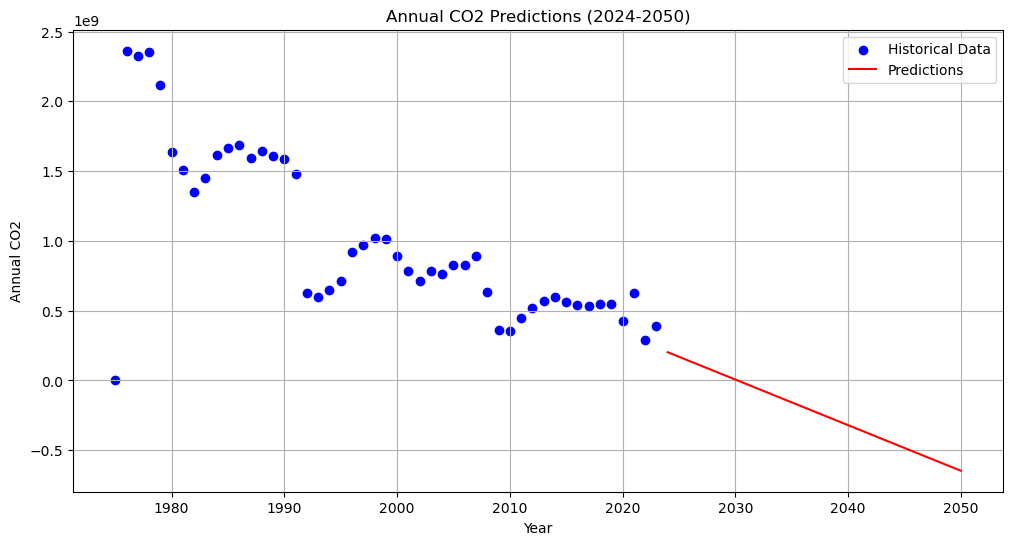


Model Performance:
R-squared score: 0.2842
Root Mean Squared Error: 293742249.9435


In [152]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming your DataFrame is named vehicle_data

# Prepare the data
X = vehicle_data[['Year']]
y = vehicle_data['Annual CO2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Create a DataFrame with future years
future_years = pd.DataFrame({'Year': range(2024, 2051)})

# Make predictions
future_co2 = model.predict(future_years)

# Create a DataFrame with the predictions
predictions = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Annual CO2': future_co2
})

# Round the predictions to two decimal places
predictions = predictions.round(6)

print("Predictions for 2024-2050:")
print(predictions)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(vehicle_data['Year'], vehicle_data['Annual CO2'], color='blue', label='Historical Data')
plt.plot(predictions['Year'], predictions['Predicted Annual CO2'], color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Annual CO2')
plt.title('Annual CO2 Predictions (2024-2050)')
plt.legend()
plt.grid(True)
plt.show()

# Print model performance metrics
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
print(f"\nModel Performance:")
print(f"R-squared score: {r2_score(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# If you want to save the predictions
# predictions.to_csv('annual_co2_predictions.csv', index=False)

R-squared score: -13943.5249
Root Mean Squared Error: 40999331146.4197
Predictions for 2024-2050:
    Year  Predicted Annual CO2
0   2024         -1.159463e+15
1   2025         -1.163570e+15
2   2026         -1.167676e+15
3   2027         -1.171783e+15
4   2028         -1.175890e+15
5   2029         -1.179996e+15
6   2030         -1.184103e+15
7   2031         -1.188210e+15
8   2032         -1.192317e+15
9   2033         -1.196423e+15
10  2034         -1.200530e+15
11  2035         -1.204637e+15
12  2036         -1.208743e+15
13  2037         -1.212850e+15
14  2038         -1.216957e+15
15  2039         -1.221063e+15
16  2040         -1.225170e+15
17  2041         -1.229277e+15
18  2042         -1.233383e+15
19  2043         -1.237490e+15
20  2044         -1.241597e+15
21  2045         -1.245703e+15
22  2046         -1.249810e+15
23  2047         -1.253916e+15
24  2048         -1.258023e+15
25  2049         -1.262130e+15
26  2050         -1.266236e+15


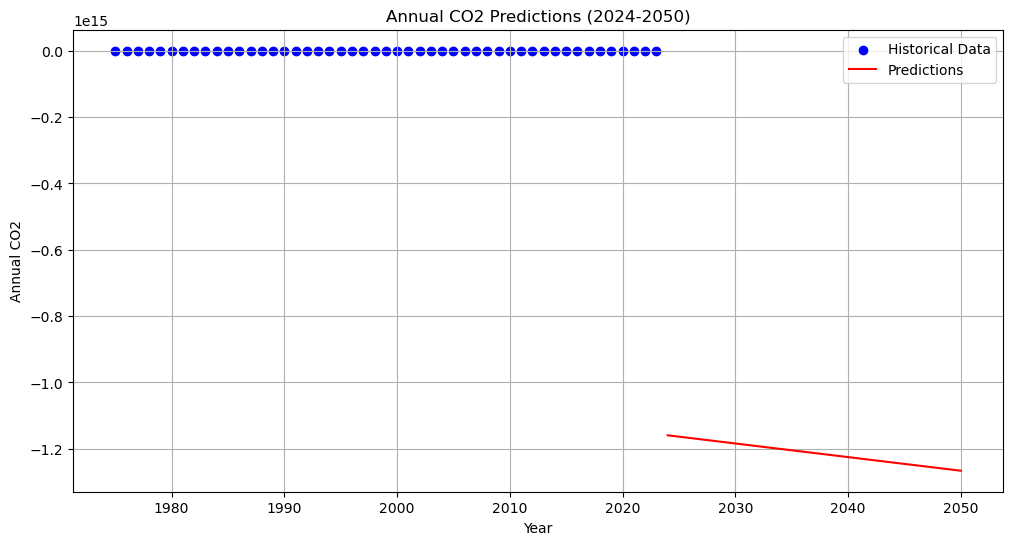

In [153]:
#FEATURE ENGINEERING
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Assuming your DataFrame is named vehicle_data

# Select relevant features
features = ['Year', 'MPG (all)', 'Total Light Veh Sales', 'BEV Sales', 'PHEV Sales']
X = vehicle_data[features]
y = vehicle_data['Annual CO2']

# Create polynomial features
degree = 2  # You can adjust this
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print(f"R-squared score: {r2_score(y_test, y_pred):.4f}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# Create a DataFrame with future years and estimates for other features
future_years = pd.DataFrame({
    'Year': range(2024, 2051),
    'MPG (all)': [30] * 27,  # Replace with your estimates
    'Total Light Veh Sales': [200] * 27,  # Replace with your estimates
    'BEV Sales': [50] * 27,  # Replace with your estimates
    'PHEV Sales': [20] * 27  # Replace with your estimates
})

# Transform the future data using the same polynomial features
future_poly = poly.transform(future_years)

# Make predictions for future years
future_predictions = model.predict(future_poly)

# Create a DataFrame with the predictions
predictions = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted Annual CO2': future_predictions
})

# Round the predictions to two decimal places
predictions = predictions.round(2)

print("Predictions for 2024-2050:")
print(predictions)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(vehicle_data['Year'], vehicle_data['Annual CO2'], color='blue', label='Historical Data')
plt.plot(predictions['Year'], predictions['Predicted Annual CO2'], color='red', label='Predictions')
plt.xlabel('Year')
plt.ylabel('Annual CO2')
plt.title('Annual CO2 Predictions (2024-2050)')
plt.legend()
plt.grid(True)
plt.show()

# If you want to save the predictions
# predictions.to_csv('annual_co2_predictions.csv', index=False)

**Total ICE Vehicle Predicted GHG Emissions**

In [154]:
# Need to factor updated per vehicle emissions and vehicle sales predictions

## ELECTRIC VEHICLE EMISSIONS CONTRIBUTION

**EV Predicted Sales**

In [155]:
EV_elec = LDV_elec_by_year
#EV_elec = EV_elec.drop(6)
EV_elec['Year'] = pd.to_datetime(EV_elec['Year'], format='%Y')
EV_elec['Year'] = EV_elec['Year'].dt.year


# Merge the two DataFrames on the 'Year' column
EV_elec= EV_elec.merge(vehicle_data[['Year', 'PHEV Stock', 'BEV Stock']], on='Year', how='left')

EV_elec['PHEV Stock'] = EV_elec['PHEV Stock']*1000000
EV_elec['BEV Stock'] = EV_elec['BEV Stock']*1000000
EV_elec['MWh/PHEV-yr'] = EV_elec['PHEV']/EV_elec['PHEV Stock']
EV_elec['MWh/BEV-yr'] = EV_elec['BEV']/EV_elec['PHEV Stock']
# Display the result
display(EV_elec)

,Year,PHEV,BEV,Total,PHEV Stock,BEV Stock,MWh/PHEV-yr,MWh/BEV-yr
0,2018,756806.0,824899.0,1581706,720000.0,1120000.0,1.051119,1.145693
1,2019,884161.0,1175714.0,2059875,740000.0,1360000.0,1.194812,1.588803
2,2020,1073251.0,1827049.0,2900300,768000.0,1560000.0,1.397462,2.378970
3,2021,1242674.0,2276123.0,3518797,1024000.0,2420400.0,1.213549,2.222776
4,2022,2168276.0,4617155.0,6785431,1208000.0,3614000.0,1.794930,3.822148
5,2023,2792300.0,6980868.0,9773167,1710000.0,5220000.0,1.632924,4.082379
6,2024,900346.0,2348595.0,3248941,NaN,NaN,NaN,NaN


**Electricity Generation Predicted GHG**

**EV Predicted GHG Emissions**